In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('2_DA - Test - Company Inputs 2.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21264 entries, 0 to 21263
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Founded Year           18756 non-null  object 
 1   Company                21264 non-null  object 
 2   # Employees            21264 non-null  object 
 3   Website                21186 non-null  object 
 4   Industry               20363 non-null  object 
 5   Keywords               12854 non-null  object 
 6   SEO Description        10627 non-null  object 
 7   Latest Funding type    3944 non-null   object 
 8   Latest Funding Amount  3471 non-null   object 
 9   Last Raised At         3944 non-null   object 
 10  Annual Revenue         3850 non-null   float64
dtypes: float64(1), object(10)
memory usage: 1.8+ MB


In [9]:
df.Industry.unique()

array(['information technology & services', 'arts & crafts',
       'government administration', nan, 'media production',
       'primary/secondary education', 'textiles', 'wholesale',
       'nonprofit organization management', 'building materials',
       'transportation/trucking/railroad', 'machinery',
       'individual & family services', 'luxury goods & jewelry',
       'hospital & health care', 'writing & editing', 'publishing',
       'accounting', 'mechanical or industrial engineering', 'banking',
       'management consulting', 'apparel & fashion', 'civil engineering',
       'recreational facilities & services', 'pharmaceuticals',
       'utilities', 'import & export', 'mining & metals',
       'marketing & advertising', 'computer hardware',
       'commercial real estate', 'architecture & planning', 'chemicals',
       'packaging & containers', 'consumer goods',
       'international trade & development', 'public policy', 'printing',
       'electrical/electronic manufactur

## Data PipeLine steps upto Data Visualizastion

###  Step 1: Data Cleaning

In [5]:
# Convert columns to appropriate types
df["Founded Year"] = pd.to_numeric(df["Founded Year"], errors='coerce')
df["Annual Revenue"] = pd.to_numeric(df["Annual Revenue"], errors='coerce')
df["# Employees"] = pd.to_numeric(df["# Employees"], errors='coerce')

# Handle missing values
df.dropna(subset=["Industry", "Founded Year"], inplace=True)
df.fillna({"Annual Revenue": df["Annual Revenue"].median()}, inplace=True)


### Step 2: Data Handling

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Filter out extreme values in Annual Revenue
df = df[df["Annual Revenue"] < 1e9]

### Step 3: Modeling

In [9]:
# Example: Group by Industry to analyze average revenue per industry
industry_revenue = df.groupby("Industry")["Annual Revenue"].mean().sort_values(ascending=False)

In [10]:
df.head()

,Founded Year,Company,# Employees,Website,Industry,Keywords,SEO Description,Latest Funding type,Latest Funding Amount,Last Raised At,Annual Revenue
0,1528.0,Birbal Learning Private Limited,19.0,http://www.birbal.org.in,information technology & services,"elearning, online courses, massive open online...",NaN,NaN,NaN,NaN,3200000.0
1,1771.0,Thewastore.com,2.0,http://www.thewastore.com,arts & crafts,NaN,NaN,NaN,NaN,NaN,3200000.0
2,1850.0,Northfield Township of Illinois,11.0,http://www.northfieldtownship.com,government administration,"social services, assessor, food pantry, voter ...","Northfield Township, located within northern C...",NaN,NaN,NaN,3200000.0
4,1865.0,epilot,59.0,http://www.pilotonline.com,media production,NaN,NaN,NaN,NaN,NaN,10000000.0
5,1876.0,Rockdale Independent School District,27.0,http://www.rockdaleisd.net,primary/secondary education,NaN,Home - Rockdale Independent School District,NaN,NaN,NaN,44513000.0


In [11]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

### Step 4: Visualization

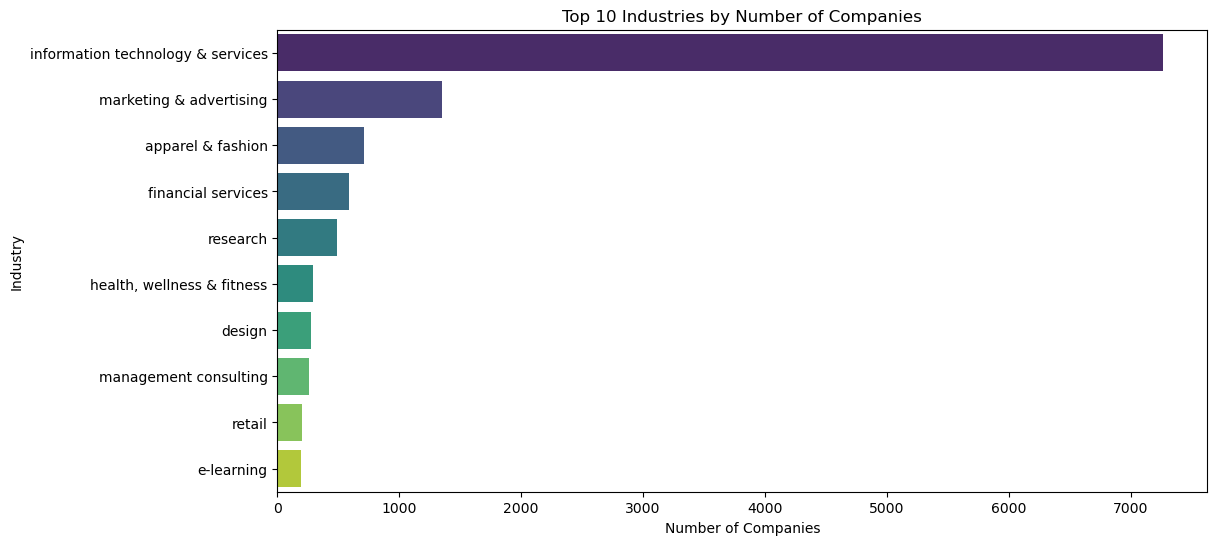

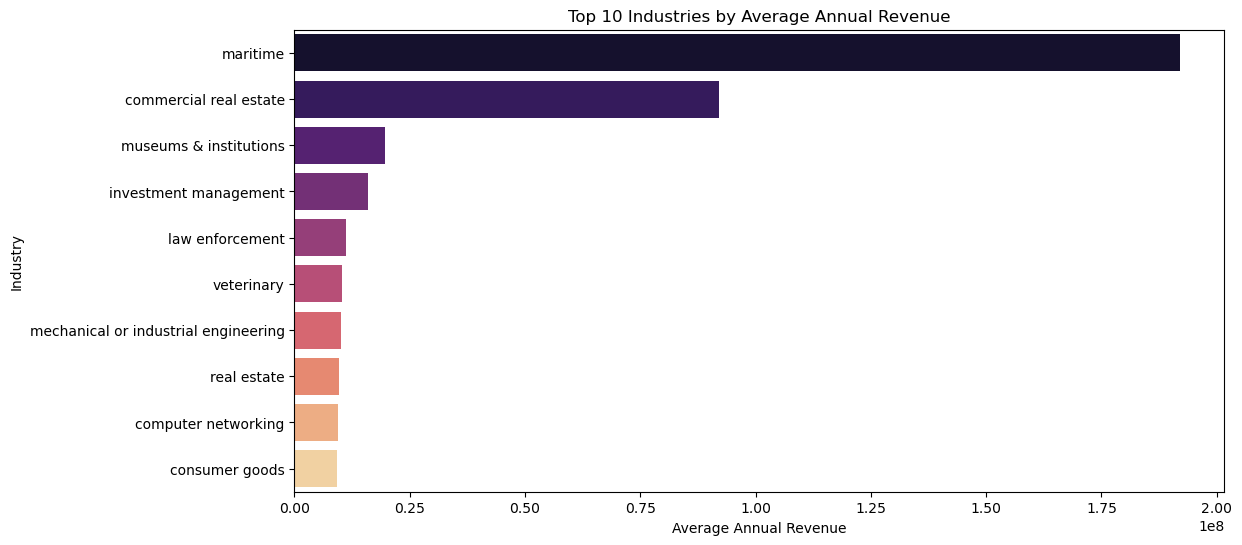

In [13]:
# Industry Distribution
plt.figure(figsize=(12, 6))
industry_counts = df["Industry"].value_counts().head(10)  # Top 10 industries
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")
plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Number of Companies")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(y=industry_revenue.head(10).index, x=industry_revenue.head(10).values, palette="magma")
plt.xlabel("Average Annual Revenue")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Average Annual Revenue")
plt.show()

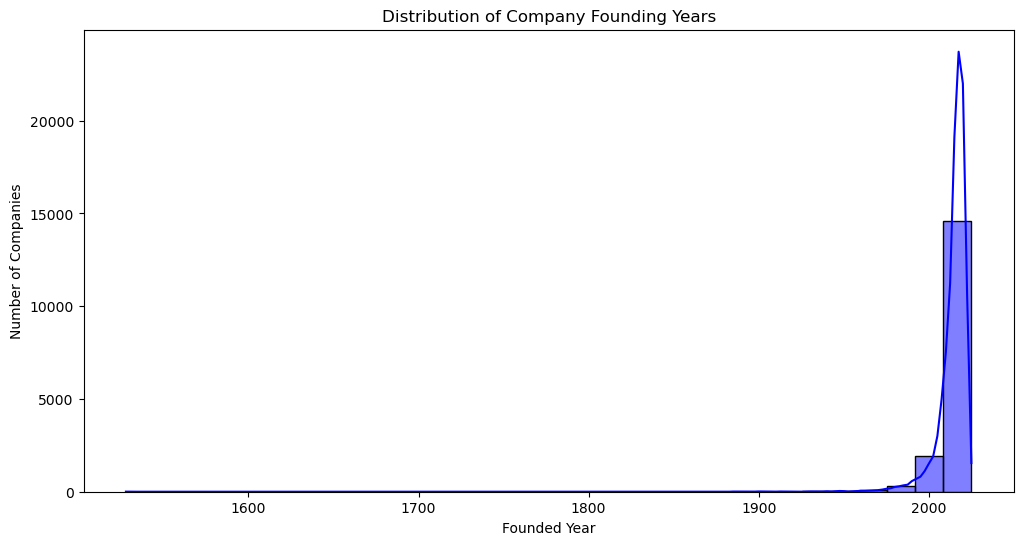

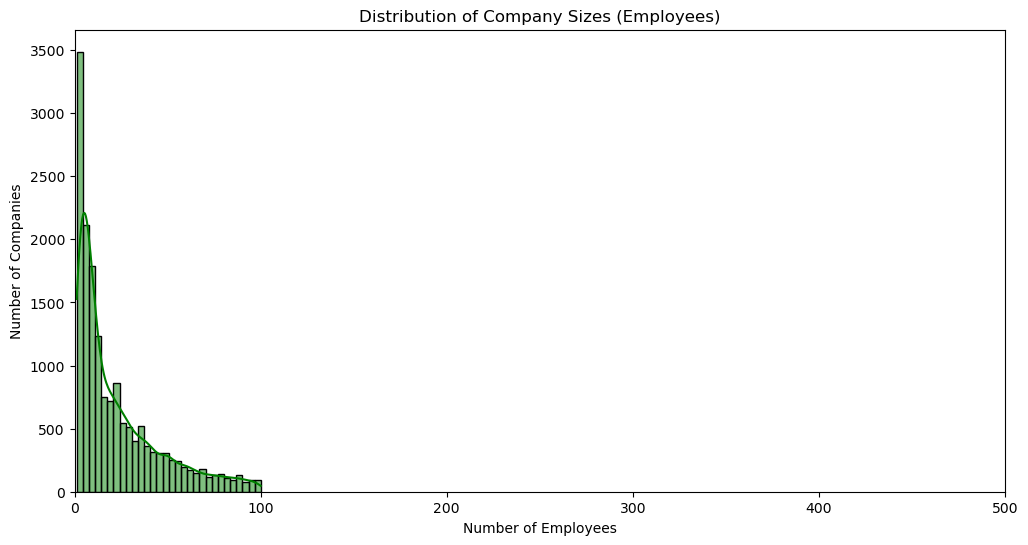

In [14]:
# Company Founding Year Trends
plt.figure(figsize=(12, 6))
sns.histplot(df["Founded Year"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Founded Year")
plt.ylabel("Number of Companies")
plt.title("Distribution of Company Founding Years")
plt.show()

# Employee Count Distribution (excluding outliers and non-numeric values)
df["# Employees"] = pd.to_numeric(df["# Employees"], errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(df["# Employees"].dropna(), bins=30, kde=True, color="green")
plt.xlabel("Number of Employees")
plt.ylabel("Number of Companies")
plt.title("Distribution of Company Sizes (Employees)")
plt.xlim(0, 500)  # Limiting to 500 employees for better visualization
plt.show()

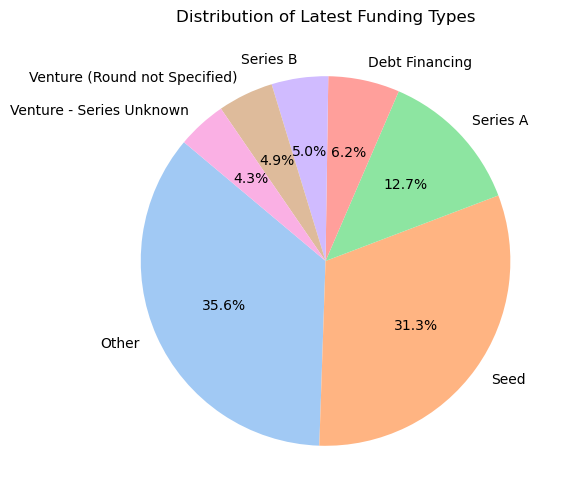

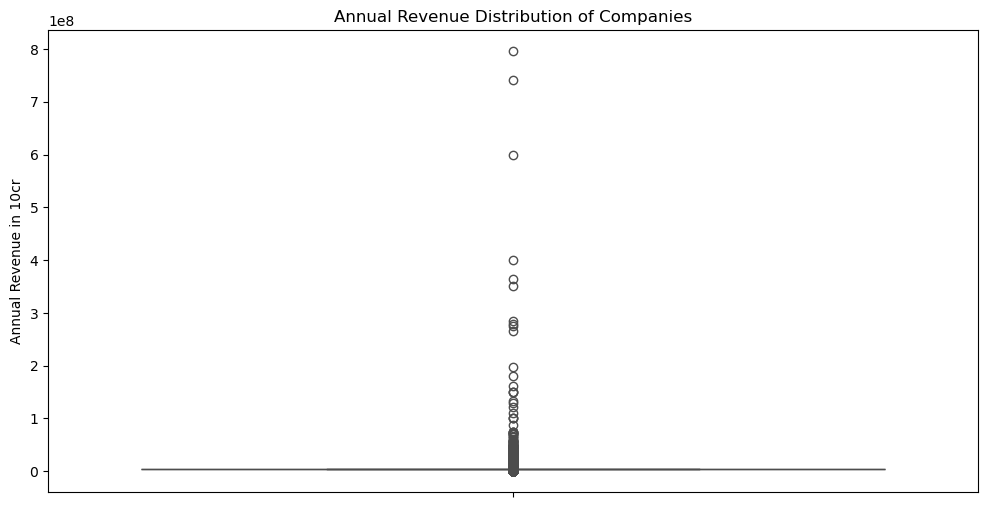

In [15]:

# Funding Type Distribution
plt.figure(figsize=(10, 6))
funding_counts = df["Latest Funding type"].value_counts().head(7)  # Top 7 funding types
plt.pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Distribution of Latest Funding Types")
plt.show()

# Annual Revenue Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(y=df["Annual Revenue"], color="red")
plt.ylabel("Annual Revenue in 10cr")
plt.title("Annual Revenue Distribution of Companies")
plt.show()